In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [6]:
wine=load_wine()

X_train,X_test,Y_train,Y_test=train_test_split(wine.data,wine.target,train_size=0.8)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [14]:
clf1=DecisionTreeClassifier(random_state=1)
clf2=RandomForestClassifier(n_estimators=100,n_jobs=8,random_state=1)
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)
score1=clf1.score(X_test,Y_test)
score1_1=cross_val_score(clf1,wine.data,wine.target,cv=5).mean()

score2=clf2.score(X_test,Y_test)
score2_1=cross_val_score(clf2,wine.data,wine.target,cv=5).mean()

print('score1:%0.2f, score2:%0.2f'%(score1,score2))
print('score1_1:%0.2f, score2_1:%0.2f'%(score1_1,score2_1))


score1:0.92, score2:0.97
score1_1:0.89, score2_1:0.98


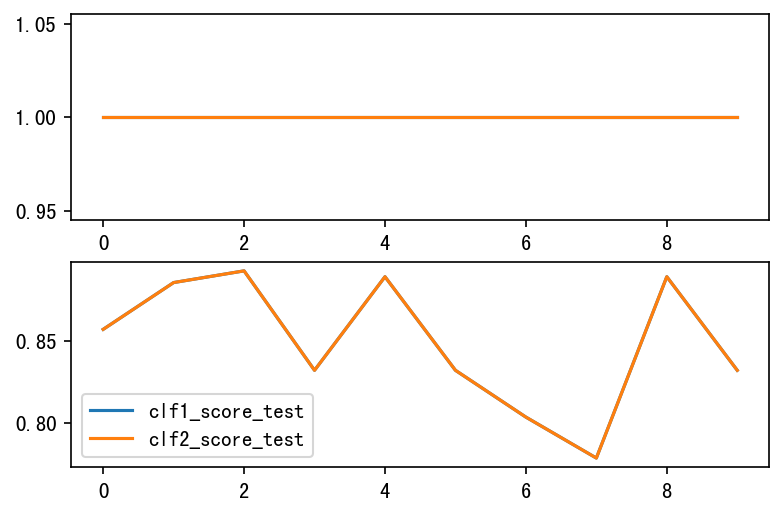

In [26]:
score_trains=dict()
score_tests=dict()
for i in range(10):
    X_train,X_test,Y_train,Y_test=train_test_split(wine.data,wine.target,train_size=0.8)
    clf1.fit(X_train,Y_train)
    clf2.fit(X_train,Y_train)
    clf1_train_score=clf1.score(X_train,Y_train)
    clf2_train_score=clf2.score(X_train,Y_train)
    score_trains['clf1']=score_trains.get('clf1',[])+[clf1_train_score]
    score_trains['clf2']=score_trains.get('clf2',[])+[clf2_train_score]
    clf1_test_score=cross_val_score(clf1,X_test,Y_test,cv=5).mean()
    clf2_test_score=cross_val_score(clf2,X_test,Y_test,cv=5).mean()
    score_tests['clf1']=score_tests.get('clf1',[])+[clf1_test_score]
    score_tests['clf2']=score_tests.get('clf2',[])+[clf2_test_score]
score_trains,score_tests

figure=plt.figure(dpi=150)
ax1=figure.add_subplot(211)
ax1.plot(range(10),score_trains['clf1'],label='clf1_score_train')
ax1.plot(range(10),score_trains['clf2'],label='clf2_score_train')
ax2=figure.add_subplot(212)
ax2.plot(range(10),score_tests['clf1'],label='clf1_score_test')
ax2.plot(range(10),score_tests['clf1'],label='clf2_score_test')
plt.legend()

## 回归器

In [34]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import SCORERS 

boston=load_boston()
regr=RandomForestRegressor(n_estimators=100,random_state=1)
print(SCORERS.keys())
-cross_val_score(regr,boston.data,boston.target,cv=5,scoring='neg_mean_squared_error')

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


array([ 8.05297911, 12.73050441, 21.63638379, 47.7117521 , 19.7159866 ])

In [78]:
from sklearn.impute import SimpleImputer

dataset=load_boston()
x_full=dataset.data
y_full=dataset.target
rows=x_full.shape[0]
columns=x_full.shape[1]



size=columns*rows
missing_rate=0.2
n_missing=int(np.floor(size*missing_rate))
rs=np.random.RandomState(1)

x_processed=np.ravel(x_full)
missing_number=rs.randint(0,size+1,n_missing)
x_processed[missing_number]=np.nan
x_processed=x_processed.reshape(rows,columns)


array([[ 0.,  0., nan, ...,  0.,  0.,  0.],
       [ 0., nan, nan, ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0., nan, ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [105]:
x_processed=pd.DataFrame(x_processed)
x_processed

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,NaN,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,NaN,NaN,0.0,0.469,NaN,78.9,NaN,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,NaN,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,NaN,NaN,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,NaN,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,NaN,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,NaN,0.0,0.573,6.120,NaN,2.2875,1.0,NaN,21.0,NaN,NaN
503,0.06076,0.0,NaN,NaN,0.573,6.976,91.0,NaN,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [111]:
imp_mean=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=2000)
x_processed1=imp_mean.fit_transform(x_processed)
x_processed1

array([[6.3200e-03, 1.8000e+01, 2.0000e+03, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 2.0000e+03, 2.0000e+03, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 2.0000e+03, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [273]:

dataset=load_boston()
x_full=dataset.data
y_full=dataset.target
rows=x_full.shape[0]
columns=x_full.shape[1]

size=columns*rows
missing_rate=0.2
n_missing=int(np.floor(size*missing_rate))
rs=np.random.RandomState(1)

x_processed=x_full.copy()
x_processed=np.ravel(x_processed)
missing_number=rs.randint(0,size+1,n_missing)
x_processed[missing_number]=np.nan
x_processed=x_processed.reshape(rows,columns)

data_x=x_processed.copy()


def regr_fillna(data):
    data=pd.DataFrame(data)
    nan_values=list()
    for i in data.columns:
        nan_value=data[i].isnull().value_counts()[1]
        nan_values.append(nan_value)
        #print(nan_values)   
    nan_values=list(np.argsort(nan_values))
    
    while nan_values:
        columns_fill_value=nan_values.pop(0)
        columns_fill_0=[i for i in data.columns if i != columns_fill_value]
#         print(columns_fill_value)
#         print(columns_fill_0)
  
        new_data=data.copy()
        new_data[columns_fill_0]=new_data[columns_fill_0].fillna(0)
        sample=new_data[columns_fill_0]
        label=new_data[columns_fill_value]
    
        Y_train=label[label.notnull()]
        Y_test=label[label.isnull()]
        X_train=sample.iloc[Y_train.index]
        X_test=sample.iloc[Y_test.index]
        regr=RandomForestRegressor()
        regr.fit(X_train,Y_train)
        pred_val=regr.predict(X_test)
        data[columns_fill_value].iloc[Y_test.index]=pred_val
        train_score=regr.score(X_train,Y_train)
        print('第%d列，训练集得分:%f'%(columns_fill_value+1,train_score))
    return data
    
    
        
data0=x_full
data1_regr=regr_fillna(data_x)
data2_mean=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(x_processed)
data3_0=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(x_processed)

estimator=RandomForestRegressor(random_state=1)

第10列，训练集得分:0.990442
第13列，训练集得分:0.948342
第8列，训练集得分:0.973252
第9列，训练集得分:0.998374
第5列，训练集得分:0.983893
第11列，训练集得分:0.976708
第7列，训练集得分:0.966703
第6列，训练集得分:0.930489
第12列，训练集得分:0.923100
第2列，训练集得分:0.974628
第3列，训练集得分:0.988850
第1列，训练集得分:0.937962
第4列，训练集得分:0.867623
21.96952120176664 26.947785593884674 32.633930703746834 32.49925528184817


In [274]:
score0=-cross_val_score(estimator,data0,y_full,scoring='neg_mean_squared_error',cv=5).mean()
score1=-cross_val_score(estimator,data1_regr,y_full,scoring='neg_mean_squared_error',cv=5).mean()
score2=-cross_val_score(estimator,data2_mean,y_full,scoring='neg_mean_squared_error',cv=5).mean()
score3=-cross_val_score(estimator,data3_0,y_full,scoring='neg_mean_squared_error',cv=5).mean()
print(score0,score1,score2,score3)

21.96952120176664 26.947785593884674 32.633930703746834 32.49925528184817


In [ ]:
data2=SimpleImputer

## 乳腺癌数据

In [276]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [281]:
cancer=load_breast_cancer()

In [303]:
clf_sample=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=1)
score_cross_sample=cross_val_score(clf_sample,cancer.data,cancer.target,cv=5,scoring='accuracy').mean()
print(score_cross_sample)


score_cross_list=list()
for i in range(1,201,10):
    clf=RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=1)
    score_cross=cross_val_score(clf,cancer.data,cancer.target,cv=5,scoring='accuracy').mean()
    score_cross_list.append(score_cross)

0.9595870206489675


0.9666356155876417 17 171


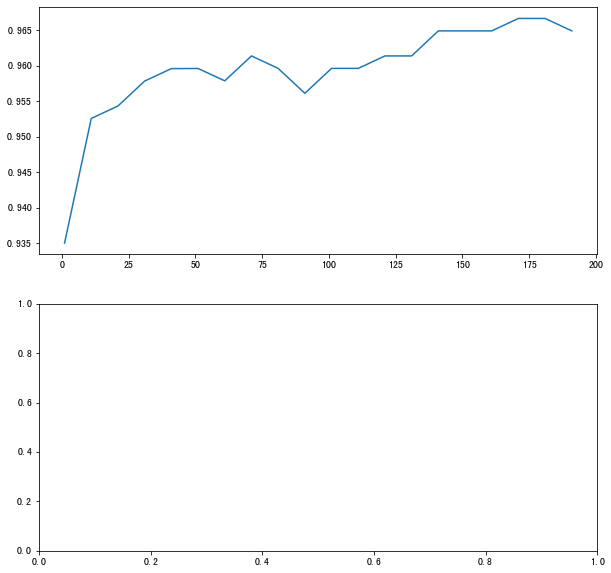

In [304]:
figure=plt.figure(figsize=(10,10))
ax1=figure.add_subplot(211)
ax2=figure.add_subplot(212)

ax1.plot(range(1,201,10),score_cross_list)
best_cross_score=np.max(score_cross_list)
best_cross_index=np.argsort(score_cross_list)[-1]
best_cross_estimator=range(1,201,10)[best_cross_index]
print(best_cross_score,best_cross_index,best_cross_estimator)

In [310]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':range(1,31,1),
    #'max_features': range(1,31,1)
}

clf_opt=RandomForestClassifier(n_estimators=best_cross_estimator,n_jobs=-1,random_state=1)
GSCV=GridSearchCV(estimator=clf_opt,param_grid=params,n_jobs=-1)
GSCV.fit(cancer.data,cancer.target)

print(GSCV.best_params_,GSCV.best_score_)

{'max_depth': 9} 0.9666356155876417


In [312]:
params={
    'max_depth':[9],
    'max_features': range(1,31,1)
}

clf_opt=RandomForestClassifier(n_estimators=best_cross_estimator,n_jobs=-1,random_state=1)
GSCV=GridSearchCV(estimator=clf_opt,param_grid=params,n_jobs=-1)
GSCV.fit(cancer.data,cancer.target)

print(GSCV.best_params_,GSCV.best_score_)

{'max_depth': 9, 'max_features': 5} 0.9666356155876417


In [308]:
cancer.data.shape

(569, 30)

In [317]:
GSCV.best_params_

{'max_depth': 9, 'max_features': 5}

In [319]:
GSCV.best_params_['max_depth']

9